In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,ConfusionMatrixDisplay
import openpyxl

pd.options.mode.copy_on_write = True

In [37]:
df = pd.read_csv('fraudTrain.csv')

In [4]:
df_test = pd.read_excel('fraudTest.xlsx')

In [38]:
df.drop(columns=['ID','trans_num'],inplace=True)

In [6]:
df_test(columns=['trans_num','ID'],inplace=True)

TypeError: 'DataFrame' object is not callable

In [7]:
df.dtypes

Time            object
Card Number    float64
merchant        object
category        object
Amount         float64
firstName       object
lastName        object
is_fraud       float64
dtype: object

# Exploring *Amount* Feature

In [8]:
df.Amount.describe()

count    1.002103e+06
mean     7.025616e+01
std      1.602039e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.742000e+01
75%      8.304000e+01
max      2.894890e+04
Name: Amount, dtype: float64

### Visualizations 

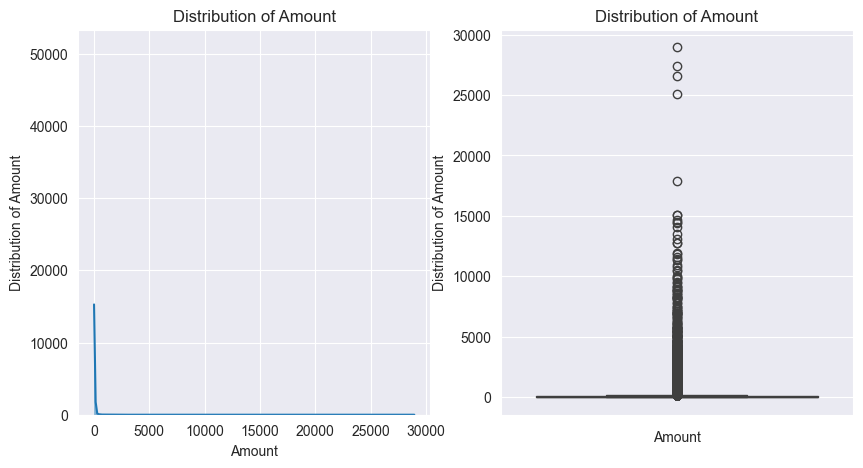

In [9]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(ax=ax1,data=df['Amount'], kde=True)
ax1.set_title('Distribution of Amount')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Distribution of ' + 'Amount')
sns.boxplot(data=df['Amount'])
ax2.set_title('Distribution of Amount')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Distribution of ' + 'Amount')
plt.show()

In [10]:
filtered_df = df[df['Amount'] > 15000]
fraudulent_ratio = (filtered_df[filtered_df['is_fraud'] == 1].shape[0] / filtered_df.shape[0]) * 100
print(fraudulent_ratio)
filtered_df

0.0


,Time,Card Number,merchant,category,Amount,firstName,lastName,is_fraud
150564,3/22/2019 13:17,4.450000e+15,"fraud_Larson, Quitzon and Spencer",travel,15034.18,Donna,Davis,0.0
187885,4/7/2019 15:32,6.540000e+15,fraud_Tillman LLC,travel,17897.24,Gina,Grimes,0.0
352894,6/14/2019 20:15,5.540000e+15,fraud_Hackett Group,travel,25086.94,Kenneth,Foster,0.0
606211,9/14/2019 22:19,3.040000e+13,fraud_Boyer-Haley,travel,26544.12,Brandon,Pittman,0.0
752016,11/17/2019 20:00,2.260000e+15,fraud_Goyette-Herzog,travel,15047.03,Juan,Sherman,0.0
787549,12/1/2019 16:19,4.980000e+15,fraud_Satterfield-Lowe,travel,28948.90,Kelly,Zimmerman,0.0
793677,12/2/2019 15:53,6.760000e+11,"fraud_Monahan, Hermann and Johns",travel,27390.12,Christopher,Henry,0.0


In [11]:
z_scores = (df['Amount'] - np.mean(df['Amount'])) / np.std(df['Amount'])

In [12]:
filtered_df = df[np.abs(z_scores) <= 3]

### Visualization after removing **outliers**

In [ ]:
fig1, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(ax=ax1,data=filtered_df['Amount'], kde=True)
ax1.set_title('Distribution of Amount')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Distribution of ' + 'Amount')
sns.boxplot(data=filtered_df['Amount'])
ax2.set_title('Distribution of Amount')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Distribution of ' + 'Amount')
plt.show()

Could not connect to 127.0.0.1: 49854
Traceback (most recent call last):
  File "D:\Programs\PyCharm\PyCharm 2024.1\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_comm.py", line 465, in start_client
    s.connect((host, port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it
Traceback (most recent call last):
  File "D:\Programs\PyCharm\PyCharm 2024.1\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_utils.py", line 81, in attach_to_debugger
    debugger.connect(pydev_localhost.get_localhost(), debugger_port)
  File "D:\Programs\PyCharm\PyCharm 2024.1\plugins\python\helpers\pydev\pydevd.py", line 671, in connect
    s = start_client(host, port)
        ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Programs\PyCharm\PyCharm 2024.1\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_comm.py", line 465, in start_client
    s.connect((host, port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the

### Visualization after *Transforming using log transformation*

In [39]:
filtered_df = df

In [40]:
filtered_df['log_amount'] = np.log(filtered_df['Amount'])

In [14]:
df_test['log_amount'] = np.log(df_test['Amount'])

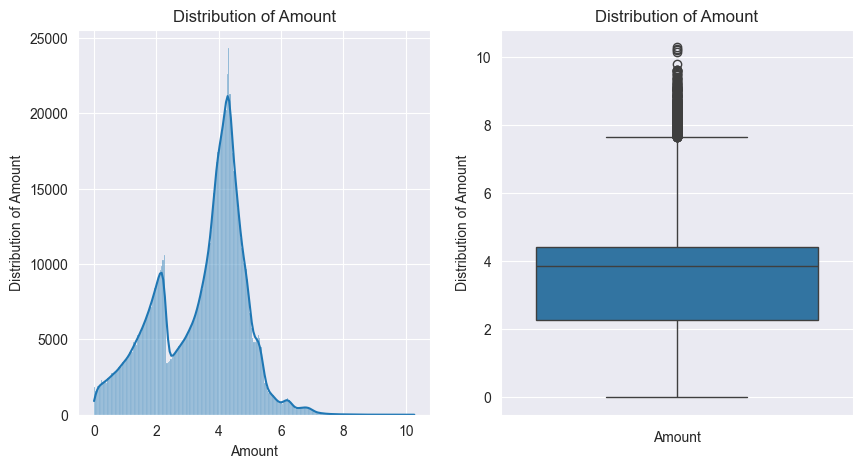

In [41]:
fig2, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(ax=ax1,data=filtered_df['log_amount'], kde=True)
ax1.set_title('Distribution of Amount')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Distribution of ' + 'Amount')
sns.boxplot(data=filtered_df['log_amount'])
ax2.set_title('Distribution of Amount')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Distribution of ' + 'Amount')
plt.show()

- Noticed that the Distribution of Amount is multimodal

# Exploring *Credit Card* feature

In [42]:
filtered_df.shape

(1002104, 9)

In [43]:
filtered_df['Card Number'].value_counts().shape[0]

320

In [92]:
fraudulent_ratio = (filtered_df[filtered_df['is_fraud'] == 1].shape[0] / filtered_df.shape[0]) * 100
filtered_df['is_fraud'].value_counts()

is_fraud
0.0    989308
1.0      2987
Name: count, dtype: int64

# Trying the model

In [93]:
filtered_df.dtypes

Time            object
Card Number    float64
merchant        object
category        object
Amount         float64
firstName       object
lastName        object
is_fraud       float64
log_amount     float64
dtype: object

In [44]:
filtered_df['Time'] = pd.to_datetime(filtered_df['Time'])

In [15]:
df_test['Time'] = pd.to_datetime(df_test['Time'])

In [45]:
filtered_df['Time:year'] = filtered_df['Time'].dt.year
filtered_df['Time:month'] = filtered_df['Time'].dt.month
filtered_df['Time:day'] = filtered_df['Time'].dt.day
filtered_df['Time:day_of_week'] = filtered_df['Time'].dt.day_of_week
filtered_df['Time:hour'] = filtered_df['Time'].dt.hour
filtered_df['Time:minute'] = filtered_df['Time'].dt.minute

In [18]:
df_test['Time:year'] = df_test['Time'].dt.year
df_test['Time:month'] = df_test['Time'].dt.month
df_test['Time:day'] = df_test['Time'].dt.day
df_test['Time:day_of_week'] = df_test['Time'].dt.day_of_week
df_test['Time:hour'] = df_test['Time'].dt.hour
df_test['Time:minute'] = df_test['Time'].dt.minute

In [46]:
filtered_df.drop(columns=['Time'], inplace=True)

In [20]:
df_test.drop(columns=['Time'],inplace=True)

In [47]:
le = preprocessing.LabelEncoder()
filtered_df['merchant'] = le.fit_transform(filtered_df['merchant'])
filtered_df['category'] = le.fit_transform(filtered_df['category'])
filtered_df['firstName'] = le.fit_transform(filtered_df['firstName'])
filtered_df['lastName'] = le.fit_transform(filtered_df['lastName'])

In [22]:
df_test['merchant'] = le.fit_transform(df_test['merchant'])
df_test['category'] = le.fit_transform(df_test['category'])
df_test['firstName'] = le.fit_transform(df_test['firstName'])
df_test['lastName'] = le.fit_transform(df_test['lastName'])

In [48]:
filtered_df.drop(columns='Amount', inplace=True)

In [24]:
df_test.drop(columns='Amount', inplace=True)

In [25]:
filtered_df.dtypes

Card Number         float64
merchant              int32
category              int32
firstName             int32
lastName              int32
is_fraud            float64
log_amount          float64
Time:year             int32
Time:month            int32
Time:day              int32
Time:day_of_week      int32
Time:hour             int32
Time:minute           int32
dtype: object

In [27]:
df_test.drop(columns=['ID','trans_num'], inplace=True)

In [28]:
df_test.dtypes

Card Number           int64
merchant              int32
category              int32
firstName             int32
lastName              int32
is_fraud              int64
log_amount          float64
Time:year             int32
Time:month            int32
Time:day              int32
Time:day_of_week      int32
Time:hour             int32
Time:minute           int32
dtype: object

In [51]:
filtered_df.dropna(axis=0, how='any',inplace=True)

In [52]:
x_train = filtered_df.drop(columns='is_fraud',axis=1)
y_train = filtered_df['is_fraud']

In [30]:
x_test = df_test.drop(columns=['is_fraud'],axis=1)
y_test = df_test['is_fraud']

In [53]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [54]:
predictions = LR.predict(x_test)

In [55]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)

print(LR_Accuracy_Score)

0.9961401355721147


In [59]:
Tree = DecisionTreeClassifier(criterion='gini')
Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
predictions = Tree.predict(x_test)

In [61]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_Jaccard_Index = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)
Tree_Confusion_Matrix = confusion_matrix(y_test,predictions)
Tree_Recall = recall_score(y_test,predictions)
Tree_Precision = precision_score(y_test,predictions)

print(Tree_Recall)
print(Tree_Precision)
print(Tree_Accuracy_Score)
print(Tree_Jaccard_Index)
print(Tree_F1_Score)
print(Tree_Confusion_Matrix)

0.4857808857808858
0.4424628450106157
0.9956524790406662
0.30133024869866976
0.4631111111111111
[[552261   1313]
 [  1103   1042]]
